<a href="https://colab.research.google.com/github/CrisMcode111/DI_Bootcamp/blob/main/w7_d1_Exercises_XP_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises XP: Text Preprocessing, NER, POS, and Word2Vec

Use this guided notebook to follow the platform instructions step by step. Prefilled cells are ready to run; cells marked TODO expect your code or analysis.

## What you will learn
- Clean and normalize raw reviews with tokenization, stopword removal, and lemmatization.
- Extract linguistic features with named entity recognition (NER) and part-of-speech (POS) tagging.
- Train a simple Word2Vec model and interpret its vector dimensions.
- Visualize word embeddings to reason about semantic neighborhoods.

## What you will create
- A `preprocess_text` function that lowercases, strips punctuation, removes stopwords, and lemmatizes.
- `perform_ner` and `perform_pos_tagging` helpers to analyze raw vs cleaned text.
- A Word2Vec model plus a helper to plot embeddings for inspection.

> Learning point
> Run the setup cells once, then progress through each exercise sequentially. Print intermediate results to verify every helper works before moving on.

## Setup · install libraries
Run once to install spaCy, nltk, gensim, and plotting utilities.

In [1]:
%pip install --quiet spacy nltk gensim matplotlib seaborn --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.2/33.2 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 78.2 MB/s eta 0:00:00


In [2]:
import nltk
from spacy.cli import download as spacy_download
import spacy

resources = [
    "punkt",
    "punkt_tab",
    "wordnet",
    "omw-1.4",
    "stopwords",
    "averaged_perceptron_tagger",
    "averaged_perceptron_tagger_eng",
    "tagsets",
]
for res in resources:
    nltk.download(res, quiet=True)

spacy_download("en_core_web_sm")

nlp = spacy.load("en_core_web_sm")
print("spaCy pipeline:", nlp.pipe_names)


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
spaCy pipeline: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


## Exercise 1 · Explore text preprocessing, NER, and POS tags

Here is the dataset you will reuse in every step.

In [5]:
data = {
    'Review': [
        "At McDonald's the food was ok and the service was bad.",
        "I would not recommend this Japanese restaurant to anyone.",
        "I loved this restaurant when I traveled to Thailand last summer.",
        "The menu of Loving has a wide variety of options.",
        "The staff was friendly and helpful at Google's employees restaurant.",
        "The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.",
        "I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.",
        "The sushi at Sushi Express is always fresh and flavorful.",
        "The steakhouse on Main Street has a cozy atmosphere and excellent steaks.",
        "The dessert selection at Sweet Treats is to die for!"
    ]
}
raw_reviews = data['Review']
raw_reviews


["At McDonald's the food was ok and the service was bad.",
 'I would not recommend this Japanese restaurant to anyone.',
 'I loved this restaurant when I traveled to Thailand last summer.',
 'The menu of Loving has a wide variety of options.',
 "The staff was friendly and helpful at Google's employees restaurant.",
 'The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.',
 'I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.',
 'The sushi at Sushi Express is always fresh and flavorful.',
 'The steakhouse on Main Street has a cozy atmosphere and excellent steaks.',
 'The dessert selection at Sweet Treats is to die for!']

### 1.1 Build `preprocess_text()`
Create a function that:
1. Lowercases and tokenizes text.
2. Removes punctuation tokens.
3. Removes English stopwords.
4. Applies a lemmatizer.
5. Returns the cleaned string joined by spaces.

Print the processed reviews to confirm every stage works.

In [6]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text: str) -> str:
    """Lowercase, tokenize, strip punctuation, drop stopwords, and lemmatize a review."""

    # 1. Lowercase
    text = text.lower()

    # 2. Tokenize text
    tokens = nltk.word_tokenize(text)

    # 3. Remove punctuation tokens
    tokens = [t for t in tokens if t not in string.punctuation]

    # 4. Filter out stopwords
    tokens = [t for t in tokens if t not in stop_words]

    # 5. Lemmatize remaining tokens
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    # 6. Join back into a cleaned string
    cleaned_text = " ".join(tokens)

    return cleaned_text



### 1.2 Create a cleaned dataset
Apply `preprocess_text` to every review and keep both raw and cleaned versions side by side.

In [7]:
# TODO: apply preprocess_text to every review and keep both raw and cleaned versions
cleaned_reviews = [preprocess_text(r) for r in raw_reviews]

if cleaned_reviews is None:
    raise ValueError("Set cleaned_reviews by applying preprocess_text to raw_reviews.")

for raw, cleaned in zip(raw_reviews, cleaned_reviews):
    print(f"RAW: {raw}")
    print(f"CLEANED: {cleaned}\n")


RAW: At McDonald's the food was ok and the service was bad.
CLEANED: mcdonald 's food ok service bad

RAW: I would not recommend this Japanese restaurant to anyone.
CLEANED: would recommend japanese restaurant anyone

RAW: I loved this restaurant when I traveled to Thailand last summer.
CLEANED: loved restaurant traveled thailand last summer

RAW: The menu of Loving has a wide variety of options.
CLEANED: menu loving wide variety option

RAW: The staff was friendly and helpful at Google's employees restaurant.
CLEANED: staff friendly helpful google 's employee restaurant

RAW: The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.
CLEANED: ambiance bella italia amazing pasta dish delicious

RAW: I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.
CLEANED: terrible experience pizza hut pizza burnt service slow

RAW: The sushi at Sushi Express is always fresh and flavorful.
CLEANED: sushi sushi express always fresh flavorful

RAW

### 1.3 Named Entity Recognition (NER)
Create `perform_ner(text)` that returns `(entity, label_)` pairs using `en_core_web_sm`. Test it on a few reviews.

In [8]:
def perform_ner(text: str):
    """Return (entity, label) pairs found by spaCy."""

    # 1. run the spaCy pipeline on the text
    doc = nlp(text)

    # 2. collect each entity text and its label_
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    return entities


### 1.4 Part-of-Speech tagging (POS)
Create `perform_pos_tagging(text)` using `nltk.pos_tag`. Test it on both raw and cleaned text.

Use `nltk.help.upenn_tagset('NN')` to recall tag meanings if needed.

In [9]:
from nltk import pos_tag, word_tokenize

def perform_pos_tagging(text: str):
    """Return POS tags for a given text."""

    # 1. tokenize the text
    tokens = word_tokenize(text)

    # 2. call nltk.pos_tag on the tokens
    tagged_tokens = pos_tag(tokens)

    return tagged_tokens


In [10]:
print("RAW POS:", perform_pos_tagging(raw_reviews[0]))
print("CLEAN POS:", perform_pos_tagging(cleaned_reviews[0]))


RAW POS: [('At', 'IN'), ('McDonald', 'NNP'), ("'s", 'POS'), ('the', 'DT'), ('food', 'NN'), ('was', 'VBD'), ('ok', 'JJ'), ('and', 'CC'), ('the', 'DT'), ('service', 'NN'), ('was', 'VBD'), ('bad', 'JJ'), ('.', '.')]
CLEAN POS: [('mcdonald', 'NN'), ("'s", 'POS'), ('food', 'NN'), ('ok', 'JJ'), ('service', 'NN'), ('bad', 'JJ')]


### 1.5 Apply NER and POS on raw vs cleaned text
Compare outputs on the same entries to see how preprocessing affects tagging.

In [11]:
sample_texts = raw_reviews[:2]

print("NER on raw text")
# TODO: loop through sample_texts and print perform_ner results
for text in sample_texts:
    print(text)
    print(" ->", perform_ner(text))

print("\nNER on cleaned text")
# TODO: repeat using cleaned_reviews
for cleaned in cleaned_reviews[:2]:
    print(cleaned)
    print(" ->", perform_ner(cleaned))

print("\nPOS tags on raw text")
# TODO
for text in sample_texts:
    print(text)
    print(" ->", perform_pos_tagging(text))

print("\nPOS tags on cleaned text")
# TODO
for cleaned in cleaned_reviews[:2]:
    print(cleaned)
    print(" ->", perform_pos_tagging(cleaned))


NER on raw text
At McDonald's the food was ok and the service was bad.
 -> [('McDonald', 'ORG')]
I would not recommend this Japanese restaurant to anyone.
 -> [('Japanese', 'NORP')]

NER on cleaned text
mcdonald 's food ok service bad
 -> [("mcdonald 's food ok service", 'ORG')]
would recommend japanese restaurant anyone
 -> [('japanese', 'NORP')]

POS tags on raw text
At McDonald's the food was ok and the service was bad.
 -> [('At', 'IN'), ('McDonald', 'NNP'), ("'s", 'POS'), ('the', 'DT'), ('food', 'NN'), ('was', 'VBD'), ('ok', 'JJ'), ('and', 'CC'), ('the', 'DT'), ('service', 'NN'), ('was', 'VBD'), ('bad', 'JJ'), ('.', '.')]
I would not recommend this Japanese restaurant to anyone.
 -> [('I', 'PRP'), ('would', 'MD'), ('not', 'RB'), ('recommend', 'VB'), ('this', 'DT'), ('Japanese', 'JJ'), ('restaurant', 'NN'), ('to', 'TO'), ('anyone', 'NN'), ('.', '.')]

POS tags on cleaned text
mcdonald 's food ok service bad
 -> [('mcdonald', 'NN'), ("'s", 'POS'), ('food', 'NN'), ('ok', 'JJ'), ('ser

## Exercise 2 · Plotting word embeddings

### 2.1 Train a Word2Vec model
Vectorize the preprocessed/tokenized dataset with `Word2Vec` from `gensim.models`. Reuse the cleaned text and adjust parameters like `vector_size`, `window`, and `sg`.

In [12]:
from gensim.models import Word2Vec

# ensure cleaned_reviews is defined from Exercise 1
# Tokenize on whitespace after preprocessing
tokenized_reviews = [review.split() for review in cleaned_reviews]

# train the Word2Vec model
w2v_model = Word2Vec(
    sentences=tokenized_reviews,
    vector_size=50,   # vector size
    window=5,         # how big is the context "window"
    min_count=1,      # includ all words (dataset-ul is small)
    workers=4,        # threads number
    sg=1              # 1 = skip-gram, 0 = CBOW
)

w2v_model


### 2.2 Inspect embedding dimensions
Print and interpret the vector size and vocabulary size from the fitted model.

In [13]:
# Print vector size
print("Vector size:", w2v_model.vector_size)

# Print vocabulary size
print("Vocabulary size:", len(w2v_model.wv))


Vector size: 50
Vocabulary size: 56


### 2.3 Plot word embeddings
Complete `plot_word_embeddings(model)` to scatter-plot the first two dimensions of the learned vectors and annotate each point with its word. Discuss whether related words cluster together.

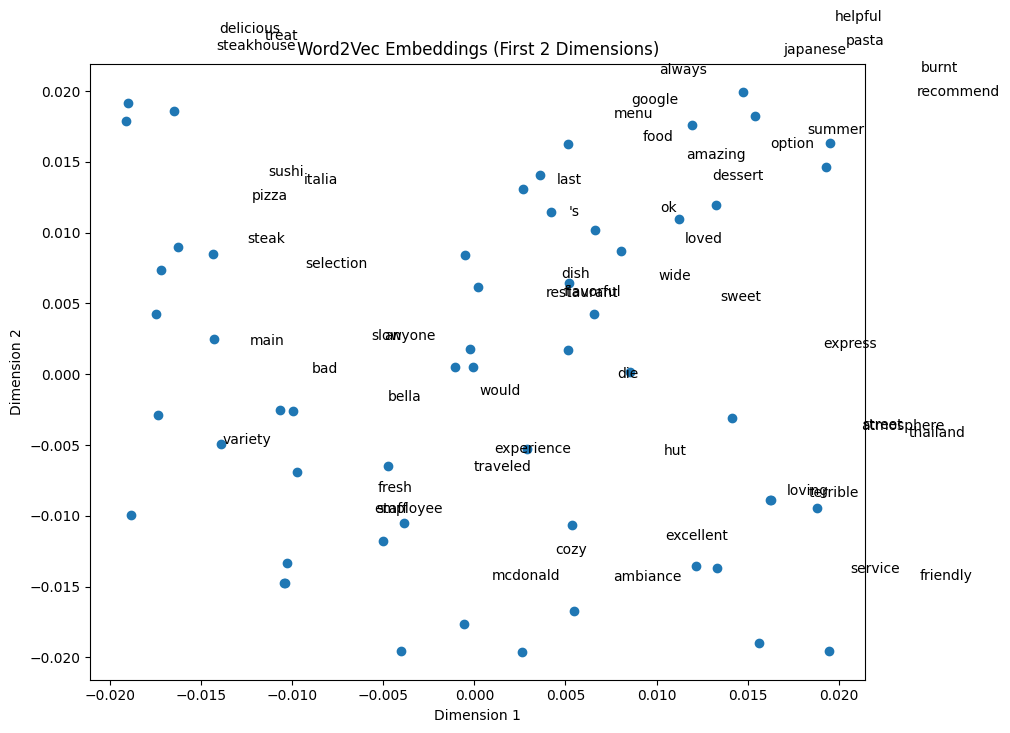

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# complete the plot_word_embeddings function
def plot_word_embeddings(model, words=None):
    # If no words are given, we take all the words from the vocabulary
    if words is None:
        words = list(model.wv.index_to_key)

    # We filter only the words that exist in the model
    valid_words = [w for w in words if w in model.wv]
    if not valid_words:
        print("No valid words in vocabulary.")
        return

    # We extract their vectors
    vectors = np.array([model.wv[w] for w in valid_words])

    # The first two dimensions
    x = vectors[:, 0]
    y = vectors[:, 1]

    # Plot
    plt.figure(figsize=(10, 8))
    plt.scatter(x, y)

    # We label each point with the corresponding word
    for i, word in enumerate(valid_words):
        plt.text(x[i] + 0.005, y[i] + 0.005, word)

    plt.title("Word2Vec Embeddings (First 2 Dimensions)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# call the plotting function using your trained model
plot_word_embeddings(w2v_model)


### 2.4 Go further
- Experiment with different preprocessing (e.g., bigrams, stemming vs lemmatization).
- Tune Word2Vec hyperparameters and compare the plots.
- Try dimensionality reduction (PCA/t-SNE) for richer visualizations.

In [15]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# We start from tokenized_reviews (a list of lists of words)
phrases = Phrases(tokenized_reviews, min_count=1, threshold=1)
bigram = Phraser(phrases)

tokenized_reviews_bigrams = [bigram[doc] for doc in tokenized_reviews]

print(tokenized_reviews[0])
print(tokenized_reviews_bigrams[0])  #you will see something like 'pizza_hut'


['mcdonald', "'s", 'food', 'ok', 'service', 'bad']
['mcdonald', "'s", 'food', 'ok', 'service', 'bad']
